In [365]:
import os
import datetime
print(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

import time
import glob
import tables as tb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches


from functools import reduce
from mpl_toolkits.mplot3d import Axes3D

2017-08-01 15:15:43


In [369]:

from itertools import product, combinations


In [326]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [327]:
from   invisible_cities.core.system_of_units_c import units
from   invisible_cities.core.core_functions  import loc_elem_1d

In [328]:
from   invisible_cities.reco.sensor_functions   import convert_channel_id_to_IC_id
import invisible_cities.reco.sensor_functions as sf       

In [329]:
from invisible_cities.evm.pmaps import S1
from invisible_cities.evm.pmaps import S2
from invisible_cities.evm.pmaps import S2Si
from invisible_cities.evm.event_model   import SensorParams

In [330]:
from invisible_cities.types.ic_types          import minmax
from invisible_cities.types.ic_types          import Counter


In [331]:
from invisible_cities.database import load_db

In [332]:
from   invisible_cities.icaro.mpl_functions   import draw_pmt_map
import invisible_cities.icaro.mpl_functions as mpl
from   invisible_cities.icaro.pmaps_mpl import plot_s12
from invisible_cities.icaro.pmaps_mpl import plot_s2si_map

In [333]:
from invisible_cities.io                       import pmap_io          as pio

In [334]:
from invisible_cities.reco                     import tbl_functions    as tbl

In [335]:
from invisible_cities.filters.s1s2_filter    import S12Selector
from invisible_cities.filters.s1s2_filter    import s2si_filter
from invisible_cities.filters.s1s2_filter    import s1s2_filter

In [336]:
from invisible_cities.core.configure          import configure

In [337]:
from invisible_cities.evm.event_model          import HitCollection
from invisible_cities.evm.event_model          import Hit

In [338]:
from invisible_cities.evm.event_model import Voxel
from invisible_cities.evm.event_model import BHit


In [339]:
from invisible_cities.reco                     import pmaps_functions  as pmp
from invisible_cities.reco                     import pmaps_functions_c  as cpmp

In [340]:
from invisible_cities.core.exceptions         import SipmEmptyList

In [341]:
from invisible_cities.reco.xy_algorithms         import barycenter
from invisible_cities.reco.xy_algorithms         import corona

In [342]:
import invisible_cities.reco.paolina_functions as plf

In [343]:
from itertools   import combinations

In [359]:
from typing import Sequence
from typing import List
from typing import Dict


In [344]:
def compute_xy_position(s2sid_peak, slice_no, algo='corona'):    
    IDs, Qs  = cpmp.sipm_ids_and_charges_in_slice(s2sid_peak, slice_no)
    xsi, ysi   = xs[IDs], ys[IDs]
    
    if algo == 'barycenter':
        try:
            return barycenter(np.stack((xsi, ysi)).T, Qs)
        except SipmEmptyList:
            return None
    else:
        try:
            return corona(np.stack((xsi, ysi)).T, Qs)
        except SipmEmptyList:
            return None




In [345]:
def split_energy(e, clusters):
    if len(clusters) == 1:
        return [e]
    qs = np.array([c.Q for c in clusters])
    return e * qs / np.sum(qs)


In [346]:
def max_events_reached(nmax, n_events_in):
    if nmax < 0:
        return False
    if n_events_in == nmax:
        print('reached max nof of events (= {})'
                  .format(nmax))
        return True
    return False


In [347]:
class HitDict:
    """Transient version of Hit Collection"""
    def __init__(self):
        self.dhits = {}

    def hit_collection(self):
        return list(self.dhits.keys())
    
    def hits(self, hit_number):
        return self.dhits[hit_number]
        



In [348]:
def get_hits(hits):
    x, y, z, q = [], [], [], []
    for hit in hits:
        x.append(hit.X)
        y.append(hit.Y)
        z.append(hit.Z)
        q.append(hit.E)
    return np.array(x), np.array(y), np.array(z), np.array(q)/np.amax(q)

    

In [349]:
def get_vox(hits, qq):
    x, y, z, q = [], [], [], []
    for hit in hits:
        x.append(hit.X)
        y.append(hit.Y)
        z.append(hit.Z)
        q.append(qq)
    return x,y,z,q




In [350]:
def plt_scatter3d(ax,x,y,z,q):
    ax.scatter(x, y, z, c=q, s=30, alpha=0.3)
    ax.set_xlabel("x (mm)")
    ax.set_ylabel("y (mm)")
    ax.set_zlabel("z (mm)")
    #fig.set_size_inches(10,8)

def plt_scatter2d(ax,x,y,q):
    ax.scatter(x, y, c=q, s=30, alpha=0.3)
    ax.set_xlabel("x (mm)")
    ax.set_ylabel("y (mm)")


In [356]:
def plot_event_3D(hits, xsc = 10, ysc = 10):

    x, y, z, q = get_hits(hits)
    print('q = {}'.format(q))
    fig = plt.figure(figsize=(12, 12))
    ax1 = fig.add_subplot(221, projection='3d')
    ax1.set_xlim3d(-198, 198)
    ax1.set_ylim3d(-198, 198)
    ax1.set_zlim3d(0, 500)
    
    ax2 = fig.add_subplot(222, projection='3d')
    ax2.set_xlim3d(-198, 198)
    ax2.set_ylim3d(-198, 198)
    #ax2.set_zlim3d(0, 500)

    ax3 = fig.add_subplot(223)
    ax3.set_xlim(-198, 198)
    ax3.set_ylim(-198, 198)
    #ax2.set_zlim3d(0, 500)

    ax4 = fig.add_subplot(224)
    ax4.set_xlim(np.amin(x) -xsc, np.amax(x) + xsc)
    ax4.set_ylim(np.amin(y) -ysc, np.amax(y) + ysc)
    #ax2.set_zlim3d(0, 500)

    
    
    plt_scatter3d(ax1,x,y,z,q) 
    plt_scatter3d(ax2,x,y,z,q)
    plt_scatter2d(ax3,x,y,q) 
    plt_scatter2d(ax4,x,y,q)

   
 
 

In [197]:
def plot_tracks(trks, xsc = 10, ysc = 10):

    qq = 1
    X = []
    Y = []
    Z = []
    Q = []
    for t in trks:
        print('voxels = {}'.format(t.nodes()))
        x, y, z, q = get_vox(t.nodes(), qq)    
        
        X += x
        Y += y
        Z += z
        Q += q
        qq +=10
        
    fig = plt.figure(figsize=(12, 12))
    ax1 = fig.add_subplot(221, projection='3d')
    ax1.set_xlim3d(-198, 198)
    ax1.set_ylim3d(-198, 198)
    ax1.set_zlim3d(0, 500)
    
    ax2 = fig.add_subplot(222, projection='3d')
    ax2.set_xlim3d(-198, 198)
    ax2.set_ylim3d(-198, 198)
    #ax2.set_zlim3d(0, 500)

    ax3 = fig.add_subplot(223)
    ax3.set_xlim(-198, 198)
    ax3.set_ylim(-198, 198)
    #ax2.set_zlim3d(0, 500)

    ax4 = fig.add_subplot(224)
    ax4.set_xlim(np.amin(x) -xsc, np.amax(x) + xsc)
    ax4.set_ylim(np.amin(y) -ysc, np.amax(y) + ysc)
    #ax2.set_zlim3d(0, 500)

    
    
    plt_scatter3d(ax1,X,Y,Z,Q) 
    plt_scatter3d(ax2,X,Y,Z,Q) 
    plt_scatter2d(ax3,X,Y,Q)  
    plt_scatter2d(ax4,X,Y,Q) 

   
 

In [456]:
def draw_cubes_around_set(voxels, d = 1):
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.set_aspect("equal")
    
    #ax3 = fig.add_subplot(223)
    ax.set_xlim(-198, 198)
    ax.set_ylim(-198, 198)
    ax.set_zlim3d(0, 500)


    for v in voxels:
        x = (v.x - d, v.x + d)
        y = (v.x - d, v.x + d)
        z = (v.x - d, v.x + d)
    
        print(x,y,z)
        # draw cube

        for s, e in combinations(np.array(list(product(x, y, z))), 2):
            if np.sum(np.abs(s-e)) == 2*d:
                ax.plot3D(*zip(s, e), color="b")

In [457]:
def draw_boxes_around_set(voxels, d = Voxel(1,1,1,1)):
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.set_aspect("equal")
    
    #ax3 = fig.add_subplot(223)
    ax.set_xlim(-198, 198)
    ax.set_ylim(-198, 198)
    ax.set_zlim3d(0, 500)



    for v in voxels:
        x = (v.X - d.X, v.X + d.X)
        y = (v.Y - d.Y, v.Y + d.Y)
        z = (v.Z - d.Z, v.Z + d.Z)
    
        print(x,y,z)
        # draw cube

        for s, e in combinations(np.array(list(product(x, y, z))), 2):
            if np.sum(np.abs(s-e)) == 2*d.X or np.sum(np.abs(s-e)) == 2*d.Y or np.sum(np.abs(s-e)) == 2*d.Z:
                ax.plot3D(*zip(s, e), color="b")

In [463]:
def draw_voxels(voxels, d = Voxel(1,1,1,1), xview=(-198, 198), yview=(-198, 198), zview=(0, 500)):
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.set_aspect("equal")
    
    #ax3 = fig.add_subplot(223)
    ax.set_xlim(xview)
    ax.set_ylim(yview)
    ax.set_zlim3d(zview)



    for v in voxels:
        x = (v.X - d.X, v.X + d.X)
        y = (v.Y - d.Y, v.Y + d.Y)
        z = (v.Z - d.Z, v.Z + d.Z)
    
        #print(x,y,z)
        # draw cube

        for s, e in combinations(np.array(list(product(x, y, z))), 2):
            if np.sum(np.abs(s-e)) == 2*d.X or np.sum(np.abs(s-e)) == 2*d.Y or np.sum(np.abs(s-e)) == 2*d.Z:
                ax.plot3D(*zip(s, e), color="b")

In [505]:
def draw_cvoxels(voxels, d = 10, xview=(-198, 198), yview=(-198, 198), zview=(0, 500)):
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.set_aspect("equal")
    
    #ax3 = fig.add_subplot(223)
    ax.set_xlim(xview)
    ax.set_ylim(yview)
    ax.set_zlim3d(zview)


    for v in voxels:
        x = (v.X - d, v.X + d)
        y = (v.Y - d, v.Y + d)
        z = (v.Z - d, v.Z + d)
    
        #print(x,y,z)
        # draw cube

        for s, e in combinations(np.array(list(product(x, y, z))), 2):
            if np.sum(np.abs(s-e)) == 2*d:
                print(*zip(s, e))
                ax.plot3D(*zip(s, e), color="b")

(0, 0) (0, 0) (0, 20)
(0, 0) (0, 20) (0, 0)
(0, 20) (0, 0) (0, 0)
(0, 0) (0, 20) (20, 20)
(0, 20) (0, 0) (20, 20)
(0, 0) (20, 20) (0, 20)
(0, 20) (20, 20) (0, 0)
(0, 20) (20, 20) (20, 20)
(20, 20) (0, 0) (0, 20)
(20, 20) (0, 20) (0, 0)
(20, 20) (0, 20) (20, 20)
(20, 20) (20, 20) (0, 20)
(10, 10) (10, 10) (10, 30)
(10, 10) (10, 30) (10, 10)
(10, 30) (10, 10) (10, 10)
(10, 10) (10, 30) (30, 30)
(10, 30) (10, 10) (30, 30)
(10, 10) (30, 30) (10, 30)
(10, 30) (30, 30) (10, 10)
(10, 30) (30, 30) (30, 30)
(30, 30) (10, 10) (10, 30)
(30, 30) (10, 30) (10, 10)
(30, 30) (10, 30) (30, 30)
(30, 30) (30, 30) (10, 30)


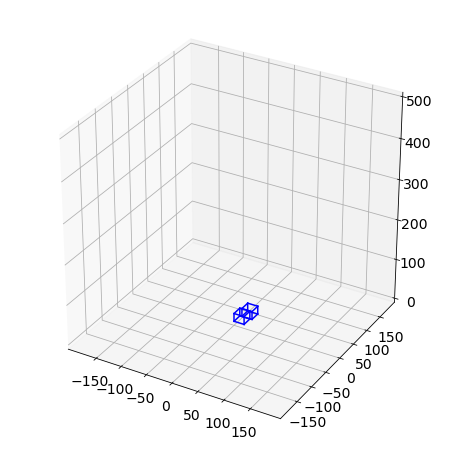

In [507]:
draw_cvoxels((v1,v2))

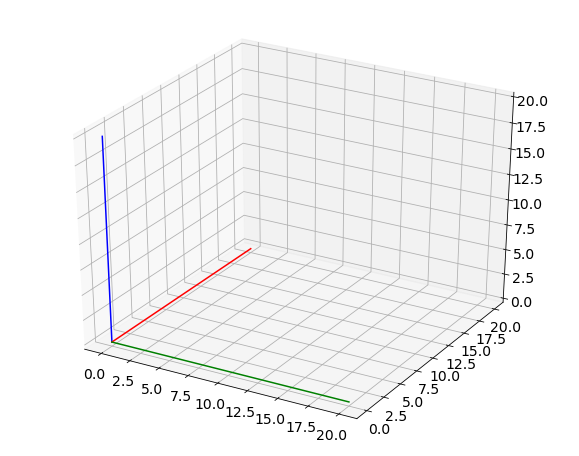

In [513]:
ax = plt.axes(projection='3d')

# Data for a 3D line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
#ax.plot3D(xline, yline, zline, 'gray')
ax.plot3D((0, 0), (0, 0), (0, 20), color="b")
ax.plot3D((0, 0), (0, 20), (0, 0), color="r")
ax.plot3D((0, 20), (0, 0), (0, 0), color="g")

In [498]:
def box_around_point(point, box_dimensions):
    """Point = (x0, y0, z0)
       box dimensions = (dx,dy,dz)
        Box has 8 vertices (vbox[0] to vbox[7])
    
    """
    x0, y0, z0 = point
    dx, dy, dz = box_dimensions
    vbox = {}
    vbox[0] = (x0 - dx/2, y0 - dy/2, z0 - dz/2)
    vbox[1] = (x0 + dx/2, y0 - dy/2, z0 - dz/2)
    vbox[2] = (x0 - dx/2, y0 + dy/2, z0 - dz/2)
    vbox[3] = (x0 + dx/2, y0 + dy/2, z0 - dz/2)
    vbox[4] = (x0 - dx/2, y0 - dy/2, z0 + dz/2)
    vbox[5] = (x0 + dx/2, y0 - dy/2, z0 + dz/2)
    vbox[6] = (x0 - dx/2, y0 + dy/2, z0 + dz/2)
    vbox[7] = (x0 + dx/2, y0 + dy/2, z0 + dz/2)
    
    #vd[0][2] = vd[1][3] = vd[4][6] = vd[5][7] = dy
    #vd[0][1] = vd[2][3] = vd[4][5] = vd[6][7] = dx
    #vd[0][4] = vd[1][5] = vd[2][6] = vd[3][7] = dz
    
    return vbox
    
    
    

In [501]:
def draw_voxels(voxels, box_size, xview=(-198, 198), yview=(-198, 198), zview=(0, 500)):
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    #ax.set_aspect("equal")
    
    ax.set_xlim3d(xview)
    ax.set_ylim3d(yview)
    ax.set_zlim3d(zview)


    for v in voxels:
        vbox = box_around_point(point = v.xyz, box_dimensions = box_size)
        ax.plot3D(vbox[0], vbox[1], color="b")
        ax.plot3D(vbox[0], vbox[2], color="b")
        ax.plot3D(vbox[1], vbox[3], color="b")
        ax.plot3D(vbox[2], vbox[3], color="b")
        ax.plot3D(vbox[4], vbox[5], color="b")
        ax.plot3D(vbox[6], vbox[7], color="b")
        ax.plot3D(vbox[4], vbox[6], color="b")
        ax.plot3D(vbox[5], vbox[7], color="b")
        ax.plot3D(vbox[0], vbox[4], color="b")
        ax.plot3D(vbox[1], vbox[5], color="b")
        ax.plot3D(vbox[1], vbox[6], color="b")
        ax.plot3D(vbox[3], vbox[7], color="b")


In [494]:
v1 = Voxel(10,10,10,10)
v2 = Voxel(20,20,20,10)

In [495]:
box_size = (10, 20, 30)

In [497]:
v1.xyz

(10, 10, 10)

(-1, -1) (-1, -1) (-1, 1)
(-1, -1) (-1, 1) (-1, -1)
(-1, 1) (-1, -1) (-1, -1)
(-1, -1) (-1, 1) (1, 1)
(-1, 1) (-1, -1) (1, 1)
(-1, -1) (1, 1) (-1, 1)
(-1, 1) (1, 1) (-1, -1)
(-1, 1) (1, 1) (1, 1)
(1, 1) (-1, -1) (-1, 1)
(1, 1) (-1, 1) (-1, -1)
(1, 1) (-1, 1) (1, 1)
(1, 1) (1, 1) (-1, 1)


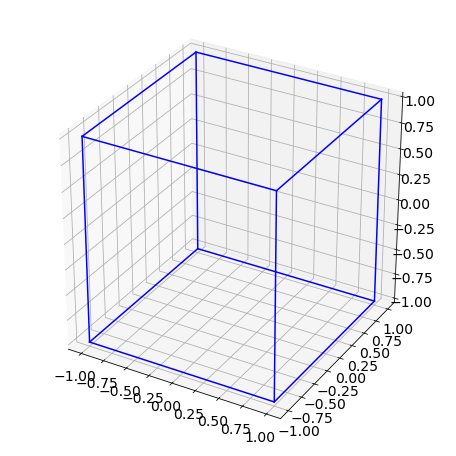

In [504]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_aspect("equal")

# draw cube
r = [-1, 1]
for s, e in combinations(np.array(list(product(r, r, r))), 2):
    if np.sum(np.abs(s-e)) == r[1]-r[0]:
        print(*zip(s, e))
        ax.plot3D(*zip(s, e), color="b")


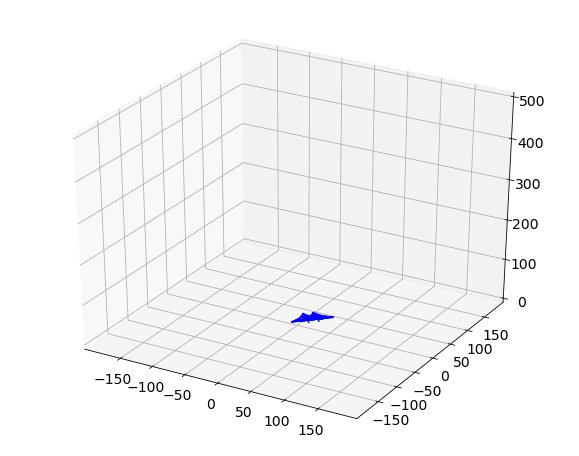

In [502]:
draw_voxels((v1,v2), box_size, xview=(-198, 198), yview=(-198, 198), zview=(0, 500))

In [19]:
run_number = -4446
DataPMT = load_db.DataPMT(run_number)
DataSiPM = load_db.DataSiPM(run_number)
xs = DataSiPM.X.values
ys = DataSiPM.Y.values
xpmt = DataPMT.X.values
ypmt = DataPMT.Y.values
pmt_active = np.nonzero(DataPMT.Active.values)[0].tolist()
channel_id = DataPMT.ChannelID.values
coeff_blr = abs(DataPMT.coeff_blr.values)
coeff_c = abs(DataPMT.coeff_c .values)
adc_to_pes = abs(DataPMT.adc_to_pes.values)
adc_to_pes_sipm = abs(DataSiPM.adc_to_pes.values)


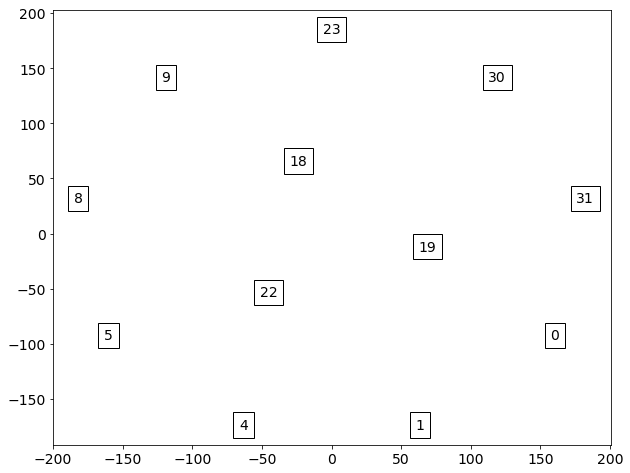

In [20]:
draw_pmt_map(-4446)

In [21]:
conf = configure(['none','/Users/jjgomezcadenas/Projects/IC/invisible_cities/config/s12_selector.conf'])

In [22]:
conf.as_dict

{'config_file': '/Users/jjgomezcadenas/Projects/IC/invisible_cities/config/s12_selector.conf',
 'drift_v': 0.001,
 'full_files': False,
 'hide_config': False,
 'no_files': False,
 'no_overrides': False,
 'print_config_only': False,
 'run_all': False,
 's1_emax': 1000000.0,
 's1_emin': 0,
 's1_ethr': 0.5,
 's1_hmax': 1000000.0,
 's1_hmin': 0,
 's1_nmax': 1,
 's1_nmin': 1,
 's1_wmax': 500.0,
 's1_wmin': 100.0,
 's2_emax': 1000000.0,
 's2_emin': 0,
 's2_ethr': 1,
 's2_hmax': 1000000.0,
 's2_hmin': 0,
 's2_nmax': 10,
 's2_nmin': 1,
 's2_nsipmmax': 100,
 's2_nsipmmin': 1,
 's2_wmax': 10000000.0,
 's2_wmin': 3000.0,
 'skip': 0,
 'verbosity': 0}

In [23]:
s1s2_selector = S12Selector(**conf.as_dict)

In [24]:
s1s2_selector

S12_selector(s1n = minmax(min=1.0, max=1.0) s1e = minmax(min=0.0, max=1000000.0) pes s1w = minmax(min=100.0, max=500.0) ns pes s1h = minmax(min=0.0, max=1000000.0) pes s1_ethr = 0.5 pes
            s2n = minmax(min=1.0, max=10.0) s2e = minmax(min=0.0, max=1000000.0)  s2w = minmax(min=3000.0, max=10000000.0) ns pes s2h = minmax(min=0.0, max=1000000.0) pes nsipm = minmax(min=1.0, max=100.0) s2_ethr = 1 pes
            

### Read data

In [477]:
PMP_file = os.path.join(os.environ['IC_DATA'],'/Users/jjgomezcadenas/Projects/ICDATA/MC_PreProd_July_2017',
                        'electrons.2615keV_PMP.z250mm.10evts.h5'.format(run_number, run_number))
print('PMP file = {}'.format(PMP_file))

PMP file = /Users/jjgomezcadenas/Projects/ICDATA/MC_PreProd_July_2017/electrons.2615keV_PMP.z250mm.10evts.h5


In [478]:
s1_dict, s2_dict, s2si_dict = pio.load_pmaps(PMP_file)

In [479]:
event_numbers, timestamps = tbl.get_event_numbers_and_timestamps_from_file_name(PMP_file)


In [480]:
rebin = 5 # rebin factor

In [481]:
drift_v = 1 * units.mm / units.mus

In [482]:
cnt = Counter()
cnt.init_counters(('n_events_tot', 'nevt_out','n_events_rejected_f1','n_events_rejected_f2'))
nmax = 10
s1s2_selector = S12Selector(**conf.as_dict)

hitc = {}

for evt_number, evt_time in zip(event_numbers, timestamps):
    if max_events_reached(nmax, cnt.counter_value('n_events_tot')):
        break
    else:
        cnt.increment_counter('n_events_tot')

    s1, s2, s2si = pio.s1_s2_si_from_pmaps(s1_dict, s2_dict, s2si_dict, evt_number)
    if s1 == None or s2 == None or s2si == None:
        continue
    # filters in s12 and s2si
    f1 = s1s2_filter(s1s2_selector, s1, s2, s2si)
    if not f1:
        cnt.increment_counter('n_events_rejected_f1')
        continue
    f2 = s2si_filter(s2si)
    if not f2:
        cnt.increment_counter('n_events_rejected_f2')
        continue
       
    # event passed selection: increment counter and write
    cnt.increment_counter('nevt_out')
    
    s1_t = s1.peak_waveform(0).tpeak
    s2, s2si = pmp.rebin_s2si(s2, s2si, rebin)
        
    npeak = 0
    lhit = []
    for peak_no, (t_peak, e_peak) in sorted(s2si.s2d.items()):
        for slice_no, (t_slice, e_slice) in enumerate(zip(t_peak, e_peak)):
            clusters = compute_xy_position(s2si.s2sid[peak_no], slice_no, algo='corona' )
            if clusters == None:
                continue
            # create hits only for those slices with OK clusters
            es       = split_energy(e_slice, clusters)
            z        = (t_slice - s1_t) * units.ns * drift_v
            
            for c, e in zip(clusters, es):
                hit       = Hit(npeak, c, z, e)
                #hitc.hits.append(hit)
                lhit.append(hit)
                npeak += 1
    hitc[cnt.counter_value('n_events_tot')] = lhit
    #print(hitc)



In [483]:
hitc.keys()

dict_keys([6, 9, 10])

q = [ 0.04755225  0.13672245  0.16399031  0.04015297  0.40130227  0.02827573
  0.01427032  0.53714382  0.04603658  0.01078398  1.          0.07857368
  0.39785437  0.08018027  0.16558446  0.15391095  0.05905997  0.08549048
  0.07696078  0.05812463  0.06256761]


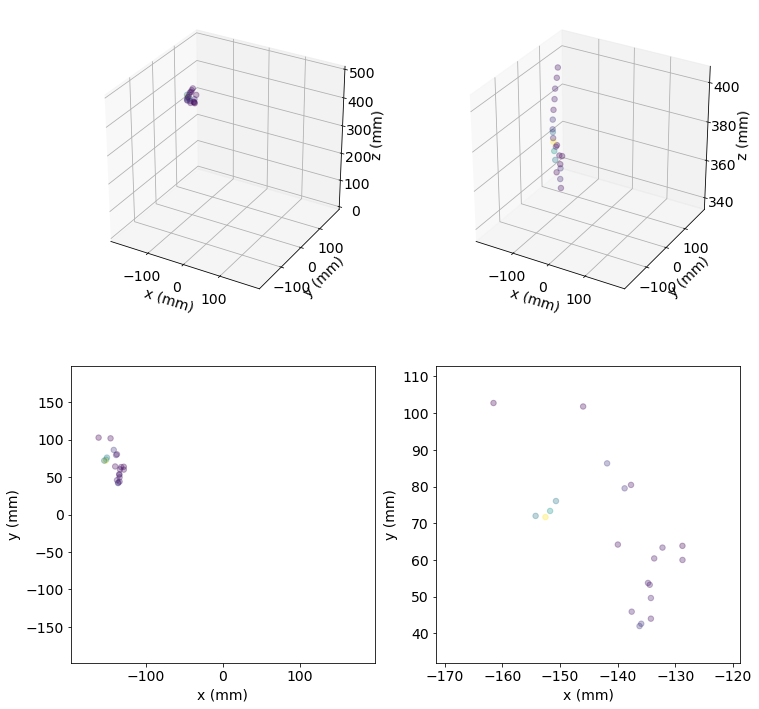

In [357]:
plot_event_3D(hitc[5])

### Paolina analysis

In [273]:
vol_min = np.array([-250, -250, -100],dtype=np.int16)  # volume minimum (x,y,z)
vol_max = np.array([250, 250, 400],dtype=np.int16)  # volume maximum (x,y,z)
vox_size = np.array([10,10,10],dtype=np.int16)    # voxel size
blob_radius = 30.                    # blob radius in mm

In [376]:
def voxelize_hits(hits : Sequence[BHit], voxel_dimensions : np.ndarray) ->List[Voxel]:
    """1. Hits are enclosed by a bounding box.
       2. Boundix box is discretized (via a hitogramdd).
       3. The energy of all the hits insidex each discreet "voxel" is added.

     """
    if not hits:
        raise NoHits
    hlo, hhi = bounding_box(hits)
    hranges = hhi - hlo
    bins = np.ceil(hranges / voxel_dimensions).astype(int)
    hit_positions = np.array([h.pos for h in hits])
    hit_energies  =          [h.E   for h in hits]
    E, edges = np.histogramdd(hit_positions, bins=bins, weights=hit_energies)
    

    def centres(a : np.ndarray) -> np.ndarray:
        return (a[1:] + a[:-1]) / 2

    cx, cy, cz = map(centres, edges)
    nz = np.nonzero(E)

    return [Voxel(cx[x], cy[y], cz[z], E[x,y,z])
            for (x,y,z) in np.stack(nz).T], edges

In [377]:
voxels, edges = voxelize_hits(hitc[5], vox_size) 

In [450]:
edges

[array([-161.53070463, -153.34080956, -145.15091448, -136.9610194 ,
        -128.77112432]),
 array([  42.001143  ,   50.67762418,   59.35410537,   68.03058655,
          76.70706774,   85.38354892,   94.06003011,  102.73651129]),
 array([ 338.4225    ,  347.70142857,  356.98035714,  366.25928571,
         375.53821429,  384.81714286,  394.09607143,  403.375     ])]

In [453]:
dx = edges[0][1] - edges[0][0]
dy = edges[1][1] - edges[1][0]
dz = edges[2][1] - edges[2][0]

In [454]:
print(dx,dy,dz)

8.18989507921 8.6764811856 9.27892857143


In [455]:
d = Voxel(dx,dy,dz,1)

In [ ]:
#draw_voxels(voxels, d = Voxel(1,1,1,1), xview=(-198, 198), yview=(-198, 198), zview=(0, 500))

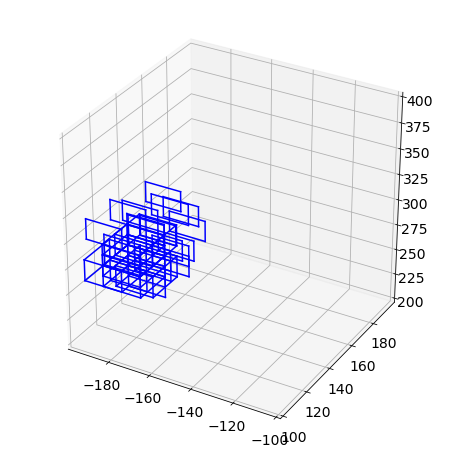

In [470]:
draw_voxels(voxels, d = d, xview=(-198, -100), yview=(100, 198), zview=(200, 400))

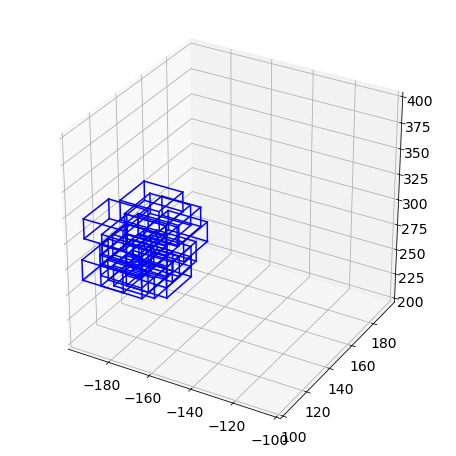

In [473]:
draw_cvoxels(voxels, d = 9, xview=(-198, -100), yview=(100, 198), zview=(200, 400))

In [406]:
edges

[array([-161.53070463, -153.34080956, -145.15091448, -136.9610194 ,
        -128.77112432]),
 array([  42.001143  ,   50.67762418,   59.35410537,   68.03058655,
          76.70706774,   85.38354892,   94.06003011,  102.73651129]),
 array([ 338.4225    ,  347.70142857,  356.98035714,  366.25928571,
         375.53821429,  384.81714286,  394.09607143,  403.375     ])]

In [379]:
for (x, y, z) in zip(*edges):
    print(x,y,z)


-161.530704635 42.0011429953 338.4225
-153.340809555 50.6776241809 347.701428571
-145.150914476 59.3541053665 356.980357143
-136.961019397 68.0305865521 366.259285714
-128.771124318 76.7070677377 375.538214286


In [380]:
def draw_voxels(voxels, edges):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.set_aspect("equal")

    for (x, y, z) in zip(*edges):
        ax.plot3D(x, y, z, color="b")



TypeError: object of type 'numpy.float64' has no len()

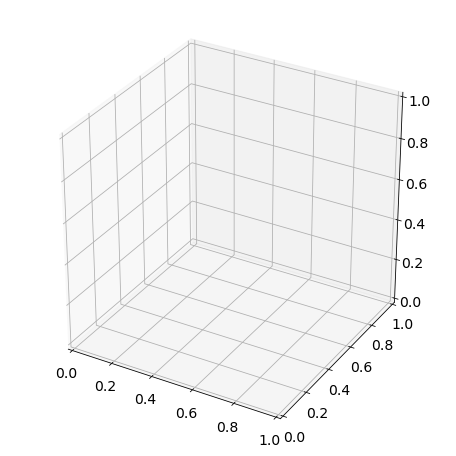

In [381]:
draw_voxels(voxels, edges)

In [274]:
voxelc = HitDict()
trkc   = HitDict() 
n_event =0
for hit_number in hitc.hit_collection():
    print("hit collection number = {}".format(hit_number))
    
    voxels = plf.voxelize_hits(hitc.hits(hit_number),vox_size)
    voxelc.dhits[hit_number] = voxels
    trks = plf.make_track_graphs(voxels,vox_size)
    trkc.dhits[hit_number] = trks
    
    print("Found {} tracks".format(len(trks)))
    tn=0
    for t in trks:
        etrk = sum([vox.E for vox in t.nodes()])
        print("trk number = {} number of voxels in track = {}; energy = {}".format(tn,len(t.nodes()), etrk))
        tn+=1
    
                                                                                     
        eblobs = plf.blob_energies(t,blob_radius)
        iter_eblobs = iter(eblobs)
        Eblob1, Eblob2 = next(iter_eblobs),next(iter_eblobs)
    
    # add distribution information (event-scale)
    #l_eblob1.append(Eblob1)
    #l_eblob2.append(Eblob2)
    
    # get the extremes
        distances = plf.shortest_paths(t)
        a,b = plf.find_extrema(distances)

        print("energy blob 1 = {}; energy blob 2 = {}".format(Eblob1, Eblob2))
        print("extrema: a = {}; b = {}".format(a, b))


    

hit collection number = 1
Found 1 tracks
trk number = 0 number of voxels in track = 1; energy = 9637.280801773071
energy blob 1 = 9637.280801773071; energy blob 2 = 9637.280801773071
extrema: a = <[183.95194335458223, 64.52284471827869, 372.1534375] 9637.280801773071>; b = <[183.95194335458223, 64.52284471827869, 372.1534375] 9637.280801773071>
hit collection number = 2
Found 1 tracks
trk number = 0 number of voxels in track = 1; energy = 15955.690887451172
energy blob 1 = 15955.690887451172; energy blob 2 = 15955.690887451172
extrema: a = <[135.28803918903043, -118.08350245540396, 492.4075] 15955.690887451172>; b = <[135.28803918903043, -118.08350245540396, 492.4075] 15955.690887451172>
hit collection number = 4
Found 1 tracks
trk number = 0 number of voxels in track = 2; energy = 10952.984818458557
energy blob 1 = 10952.984818458557; energy blob 2 = 10952.984818458557
extrema: a = <[75.87697292567489, -32.43219939817808, 221.2321875] 3055.1332111358643>; b = <[75.87697292567489, -32.

In [275]:
voxelc.hit_collection()

[1, 2, 4, 5, 7, 9, 10]

In [276]:
voxelc.hits(5)

[<[-157.43575709510287, 72.36882714493419, 370.89875] 10504.618860191966>,
 <[-157.43575709510287, 98.39827070173655, 361.6198214285714] 284.7314279995067>,
 <[-149.2458620158909, 72.36882714493419, 352.3408928571429] 10595.654428118609>,
 <[-149.2458620158909, 72.36882714493419, 361.6198214285714] 40585.478728751455>,
 <[-149.2458620158909, 98.39827070173655, 352.3408928571429] 746.5690362765273>,
 <[-141.05596693667894, 46.33938358813184, 370.89875] 2117.013769202566>,
 <[-141.05596693667894, 63.69234595933341, 352.3408928571429] 1060.165869451849>,
 <[-141.05596693667894, 81.04530833053497, 343.06196428571434] 4865.437316894531>,
 <[-141.05596693667894, 89.72178951613576, 352.3408928571429] 4329.864953302057>,
 <[-132.86607185746698, 46.33938358813184, 370.89875] 4371.955505371094>,
 <[-132.86607185746698, 46.33938358813184, 380.1776785714286] 5623.108642578125>,
 <[-132.86607185746698, 46.33938358813184, 389.45660714285714] 2257.2202758789062>,
 <[-132.86607185746698, 55.0158647737

In [281]:
voxels = voxelc.hits(5)

In [288]:
def neighbours(va : Voxel, vb : Voxel, contiguity : float = 1.5) ->bool:
    return ((abs(va.pos - vb.pos) / voxel_dimensions) < contiguity).all()

for va, vb in combinations(voxels, 2):
    if neighbours(va, vb):
        print('Found neighbours, va = {} \n vb = {} \n contiguity = {} \n distance = {} \n ------\n'.format(va, vb,
                       (abs(va.pos - vb.pos))/ voxel_dimensions, np.linalg.norm(va.pos - vb.pos)))


Found neighbours, va = <[-157.43575709510287, 72.36882714493419, 370.89875] 10504.618860191966> 
 vb = <[-149.2458620158909, 72.36882714493419, 361.6198214285714] 40585.478728751455> 
 contiguity = [ 0.81898951  0.          0.92789286] 
 distance = 12.376303844127868 
 ------

Found neighbours, va = <[-157.43575709510287, 98.39827070173655, 361.6198214285714] 284.7314279995067> 
 vb = <[-149.2458620158909, 98.39827070173655, 352.3408928571429] 746.5690362765273> 
 contiguity = [ 0.81898951  0.          0.92789286] 
 distance = 12.376303844127825 
 ------

Found neighbours, va = <[-149.2458620158909, 72.36882714493419, 352.3408928571429] 10595.654428118609> 
 vb = <[-149.2458620158909, 72.36882714493419, 361.6198214285714] 40585.478728751455> 
 contiguity = [ 0.          0.          0.92789286] 
 distance = 9.278928571428537 
 ------

Found neighbours, va = <[-149.2458620158909, 72.36882714493419, 352.3408928571429] 10595.654428118609> 
 vb = <[-141.05596693667894, 63.69234595933341, 35

In [290]:
trks = plf.make_track_graphs(voxels,vox_size)

In [291]:
tn = 0
for t in trks:
    etrk = sum([vox.E for vox in t.nodes()])
    print("trk number = {} number of voxels in track = {}; energy = {}".format(tn,len(t.nodes()), etrk))
    tn+=1



trk number = 0 number of voxels in track = 17; energy = 96227.37454223634


In [293]:
distances = plf.shortest_paths(trks[0])

In [316]:
distances

{<[-157.43575709510287, 98.39827070173655, 361.6198214285714] 284.7314279995067>: {<[-157.43575709510287, 98.39827070173655, 361.6198214285714] 284.7314279995067>: 0,
  <[-149.2458620158909, 98.39827070173655, 352.3408928571429] 746.5690362765273>: 12.376303844127825,
  <[-141.05596693667894, 89.72178951613576, 352.3408928571429] 4329.864953302057>: 24.307594938246051,
  <[-141.05596693667894, 81.04530833053497, 343.06196428571434] 4865.437316894531>: 37.011131500863463,
  <[-149.2458620158909, 72.36882714493419, 352.3408928571429] 10595.654428118609>: 52.125833701246293,
  <[-149.2458620158909, 72.36882714493419, 361.6198214285714] 40585.478728751455>: 61.40476227267483,
  <[-141.05596693667894, 63.69234595933341, 352.3408928571429] 1060.165869451849>: 64.057124795364501,
  <[-132.86607185746698, 63.69234595933341, 352.3408928571429] 376.7816625579902>: 72.247019874576466,
  <[-157.43575709510287, 72.36882714493419, 370.89875] 10504.618860191966>: 73.781066116802691,
  <[-132.86607185

In [303]:
from networkx           import Graph
from typing import Dict
from functools   import partial
import networkx as nx
def shortest_paths(track_graph : Graph) -> Dict[Voxel, Dict[Voxel, float]]:
    f = partial(nx.all_pairs_dijkstra_path_length, weight='distance')
    return f (track_graph)


In [319]:
from networkx           import Graph
from invisible_cities.evm.event_model import Voxel
from invisible_cities.core.exceptions import NoHits
from invisible_cities.core.exceptions import NoVoxels
from invisible_cities.evm.event_model import BHit
from typing import Sequence

def find_extrema(distance : Dict[Voxel, Dict[Voxel, float]]) -> Sequence[Voxel]:
    if not distance:
        raise NoVoxels
    if len(distance) == 1:
        only_voxel = next(iter(distance))
        return (only_voxel, only_voxel)
    first, last, max_distance = None, None, 0
    for source, target in combinations(distance, 2):
        d = distance[source][target]
        if d > max_distance:
            first, last, max_distance = source, target, d
    return (first, last)

In [320]:
a, b = find_extrema(distances)

In [311]:
def energy_within_radius(distances : Dict[Voxel, Dict[Voxel, float]], radius : float) -> float:
    return sum(v.E for (v, d) in distances.items() if d < radius)


In [314]:
a

<[-157.43575709510287, 98.39827070173655, 361.6198214285714] 284.7314279995067>

In [315]:
b

<[-132.86607185746698, 63.69234595933341, 398.7355357142857] 3186.6585388183594>

In [321]:
energy_within_radius(distances[a], radius = 30)

5361.1654175780914

In [322]:
energy_within_radius(distances[b], radius = 30)

13098.996490478516

In [323]:
def blob_energies(track_graph : Graph, radius : float) ->Sequence[float]:
    distances = shortest_paths(track_graph)
    a,b = find_extrema(distances)
    Ea = energy_within_radius(distances[a], radius)
    Eb = energy_within_radius(distances[b], radius)
    return (Ea, Eb) if Ea < Eb else (Eb, Ea)


In [324]:
blob_energies(trks[0], 30) 

(5361.1654175780914, 13098.996490478516)

In [239]:
MAX3D = np.array([float(' inf')] * 3)
MIN3D = np.array([float('-inf')] * 3)

def bounding_box(seq):
    posns = [x.pos for x in seq]
    return (reduce(np.minimum, posns, MAX3D),
            reduce(np.maximum, posns, MIN3D))

voxel_dimensions = vox_size
def neighbours(va, vb ):
    return ((abs(va.pos - vb.pos) / voxel_dimensions) < 1.5).all()



In [240]:
bounding_box(voxelc.hits(1))

(array([  58.20031256,  -43.99491738,  457.625     ]),
 array([  58.20031256,  -16.01695439,  500.125     ]))

In [245]:
va = voxelc.hits(1)[0]
vb = voxelc.hits(1)[1]

In [246]:
va

<[58.20031255654795, -43.99491737974763, 457.625] 7202.642684936523>

In [247]:
vb

<[58.20031255654795, -16.01695438712691, 500.125] 1212.2438201904297>

In [248]:
neighbours(va, vb )

False

In [250]:
np.linalg.norm(va.pos - vb.pos)

50.882378218951743

In [253]:
(abs(va.pos - vb.pos)/ voxel_dimensions)

array([ 0.       ,  2.7977963,  4.25     ])

q = [ 1.          0.16830542]
q = [ 1.]
q = [ 0.61381701  1.        ]
q = [ 1.]
q = [ 0.71592358  1.          0.13750025]
q = [ 1.          0.81253875  0.06086158  0.0362151   0.10153226]
q = [ 1.          0.12441345]
q = [ 1.]


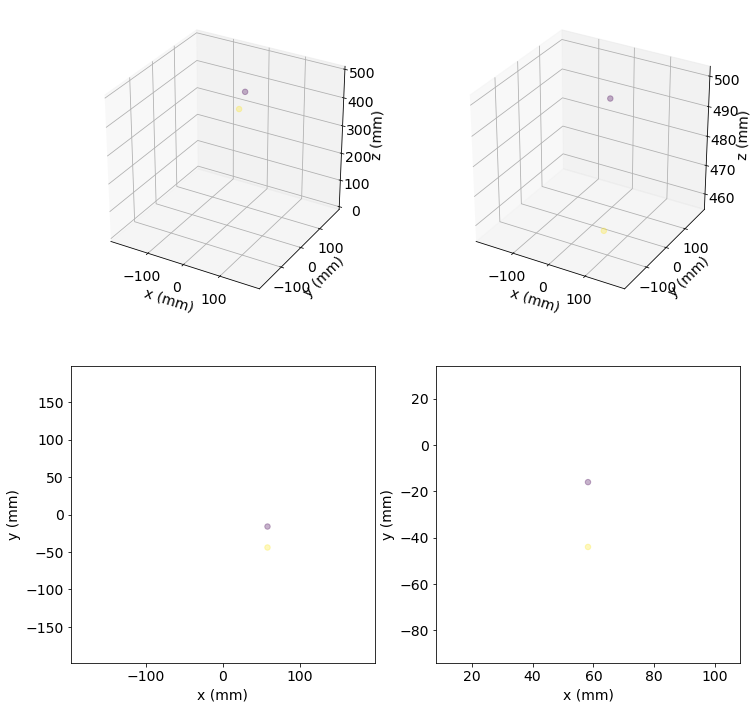

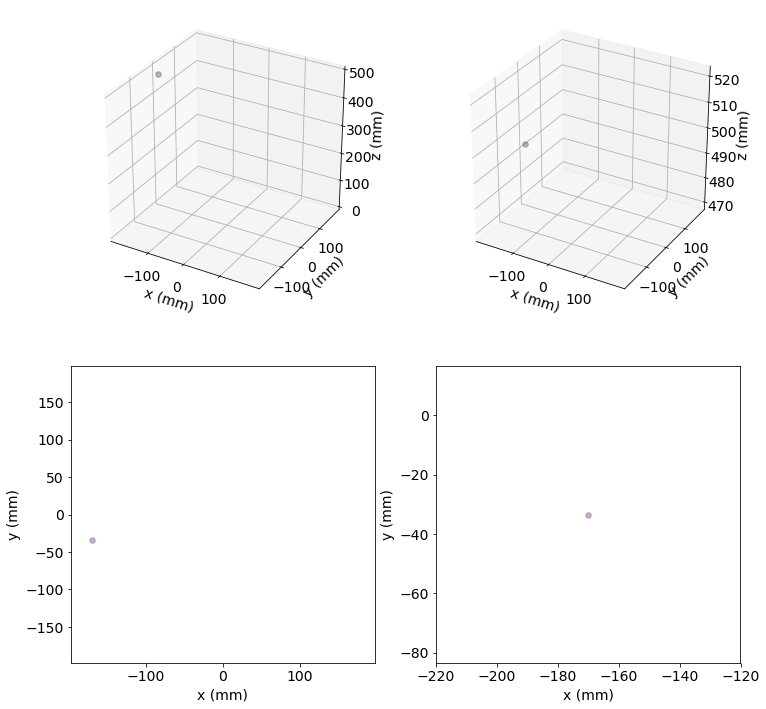

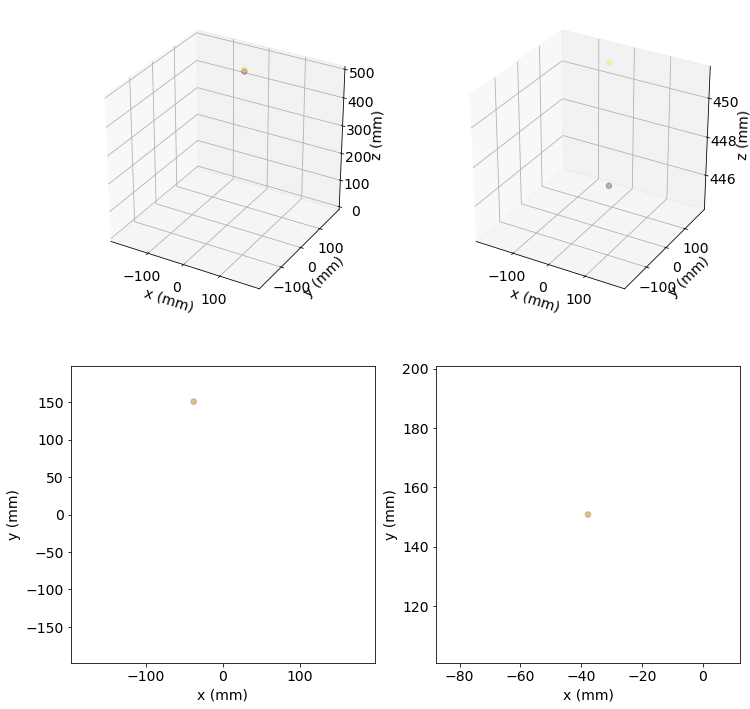

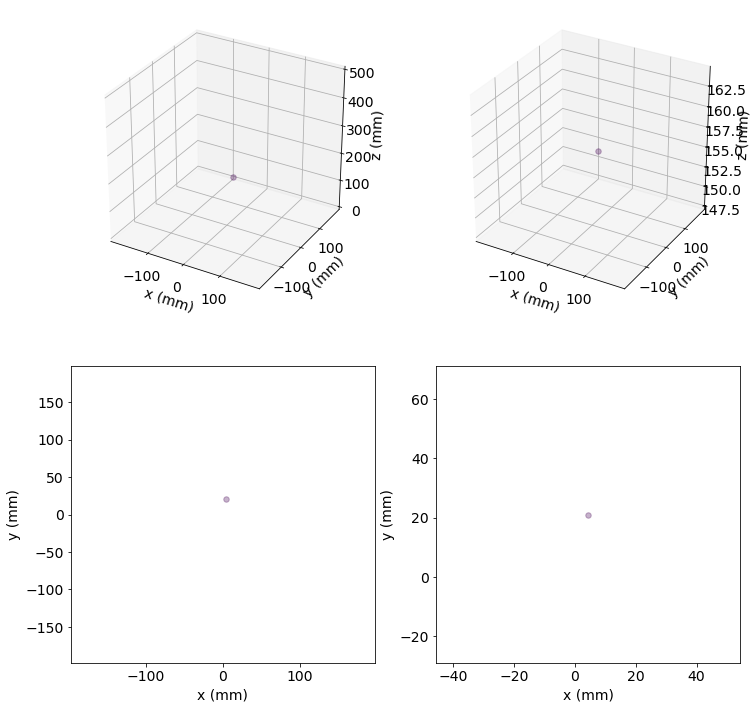

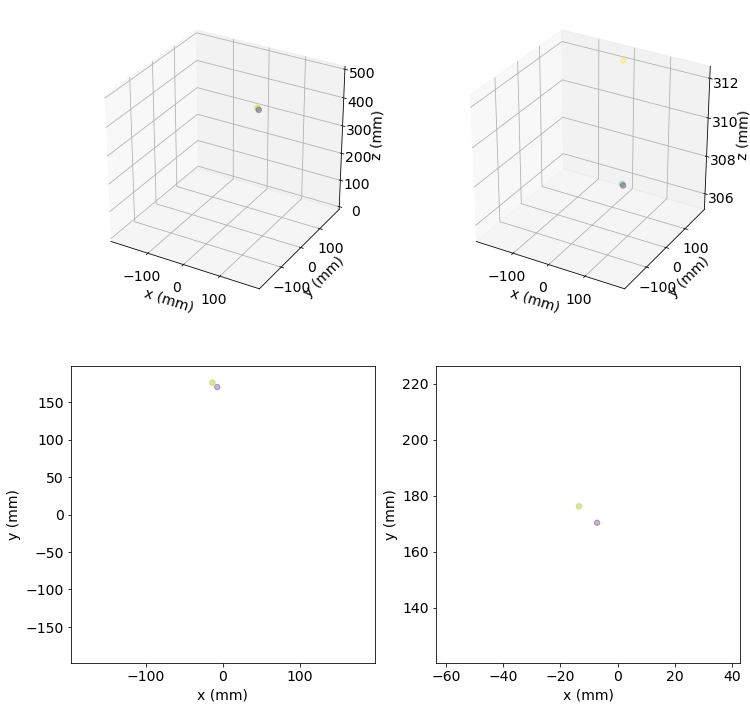

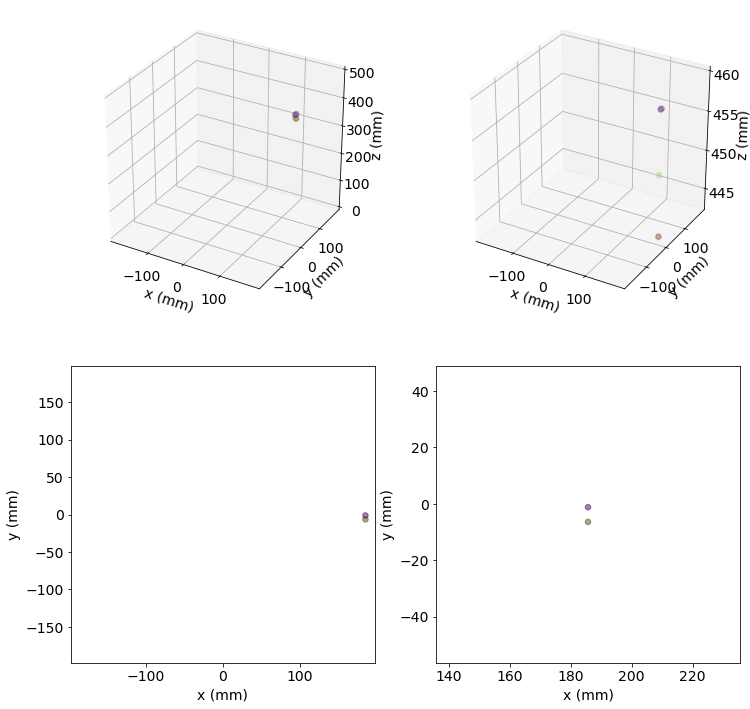

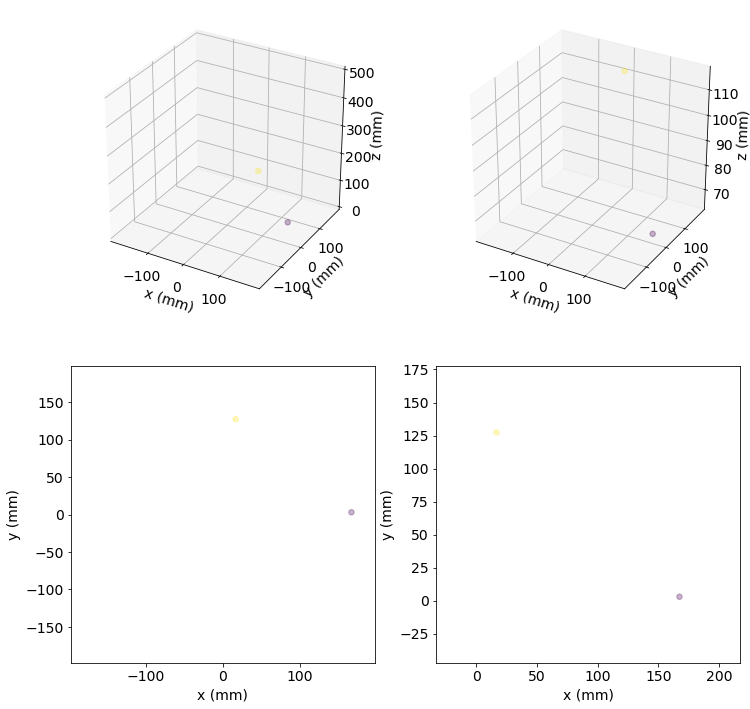

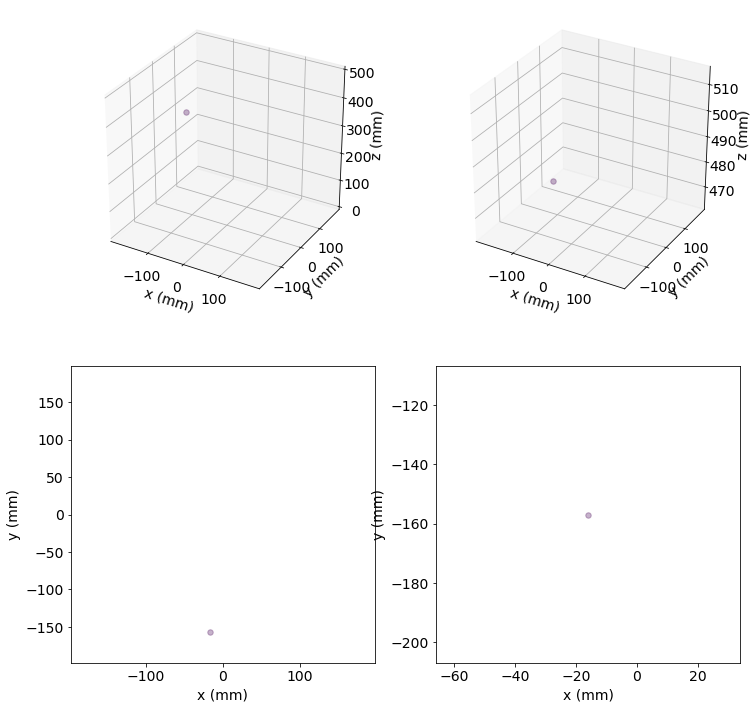

In [225]:
for hit_no in voxelc.hit_collection():
    plot_event_3D(voxelc.hits(hit_no))

In [226]:
trkc.hit_collection()

[1, 2, 3, 4, 6, 7, 8, 9]

voxels = [<[58.20031255654795, -43.99491737974763, 457.625] 7202.642684936523>]
voxels = [<[58.20031255654795, -16.01695438712691, 500.125] 1212.2438201904297>]
voxels = [<[-170.1142097952548, -33.42136912325782, 495.35] 8381.332733154297>]
voxels = [<[-37.80256992975915, 150.83237717726092, 444.625] 6048.525588989258>, <[-37.80256992975915, 150.83237717726092, 451.125] 9853.95556640625>]
voxels = [<[4.297863865345066, 21.00452469527123, 155.95] 19493.415645599365>]
voxels = [<[-13.560409138752863, 176.17048601279623, 305.625] 7428.1527099609375>, <[-13.560409138752863, 176.17048601279623, 312.125] 10375.622375488281>, <[-7.196132498687266, 170.30587249204768, 305.625] 1426.6506805419922>]
voxels = [<[185.66259344616776, -6.430576684812298, 451.375] 8975.615417480469>, <[185.66259344616776, -1.205244276893161, 443.375] 400.0458984375>, <[185.66259344616776, -6.430576684812298, 459.375] 672.3003540039062>, <[185.66259344616776, -1.205244276893161, 459.375] 1121.5644226074219>, <[185.662

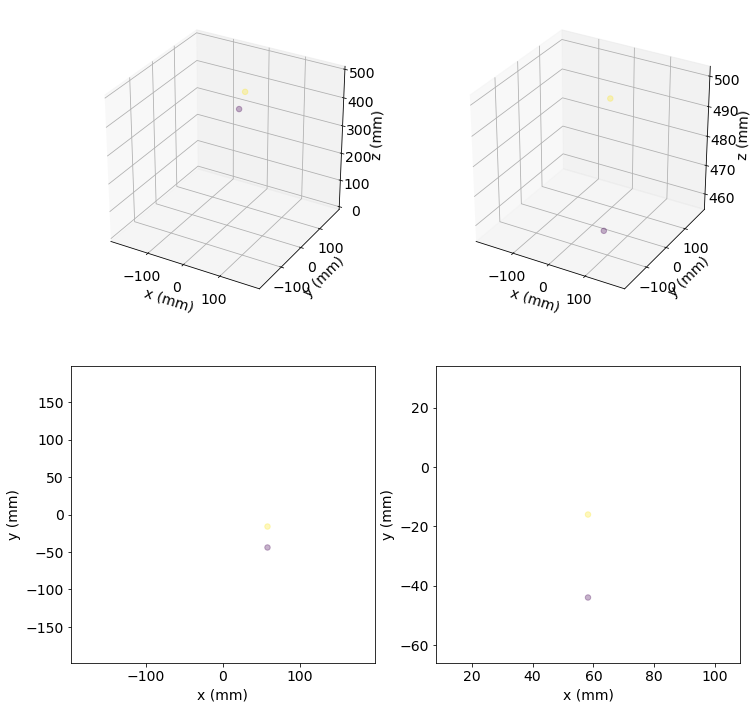

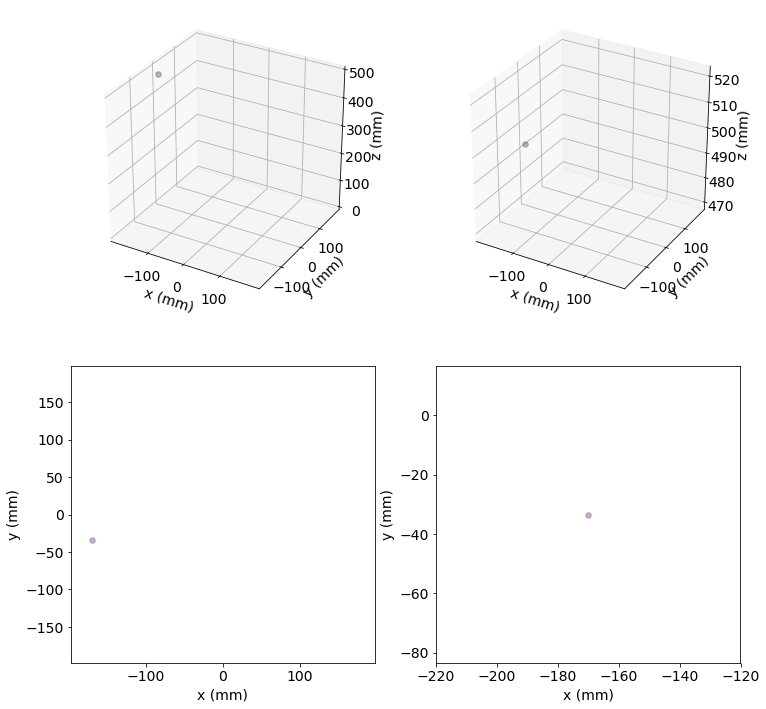

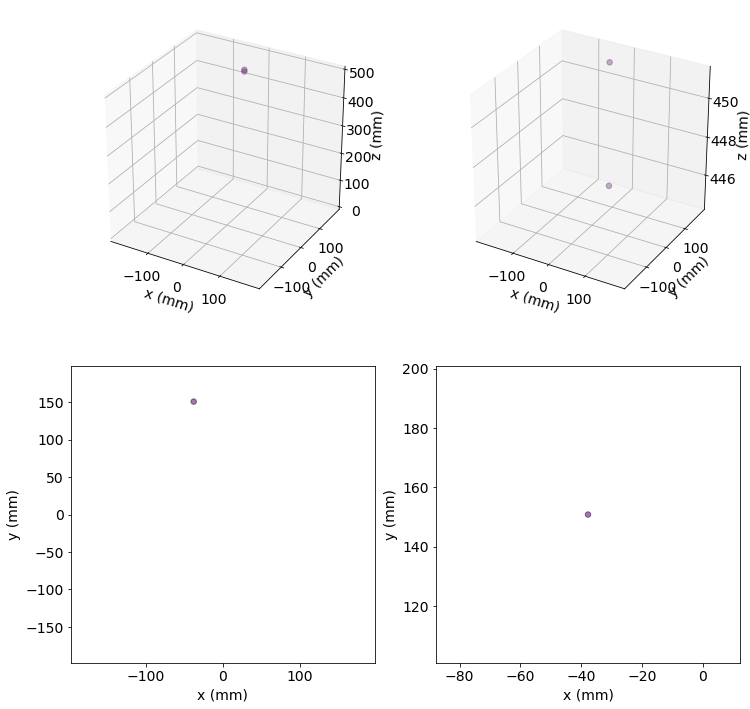

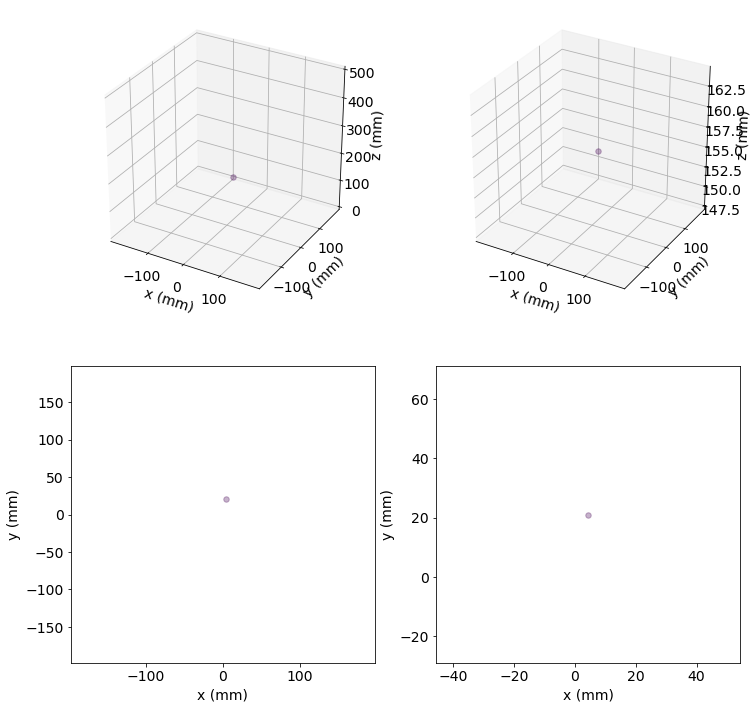

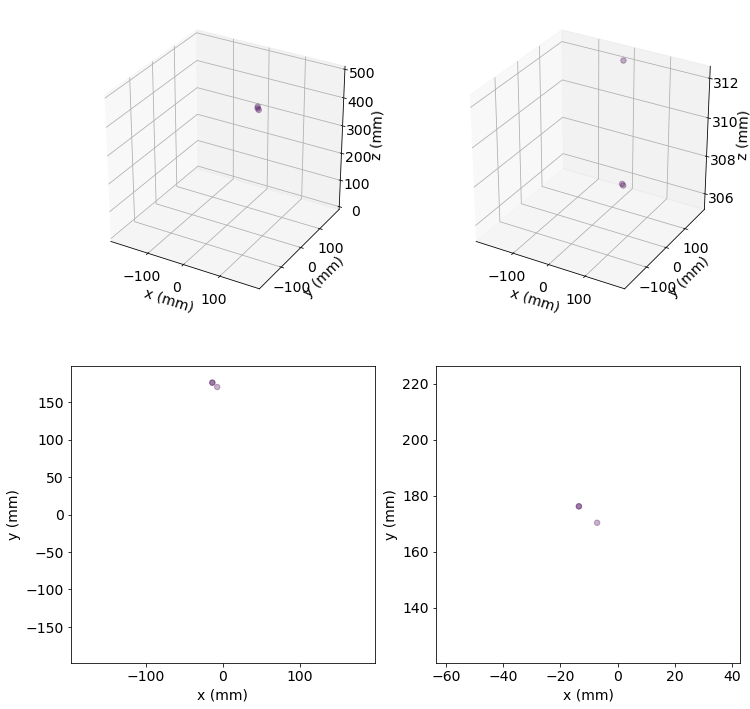

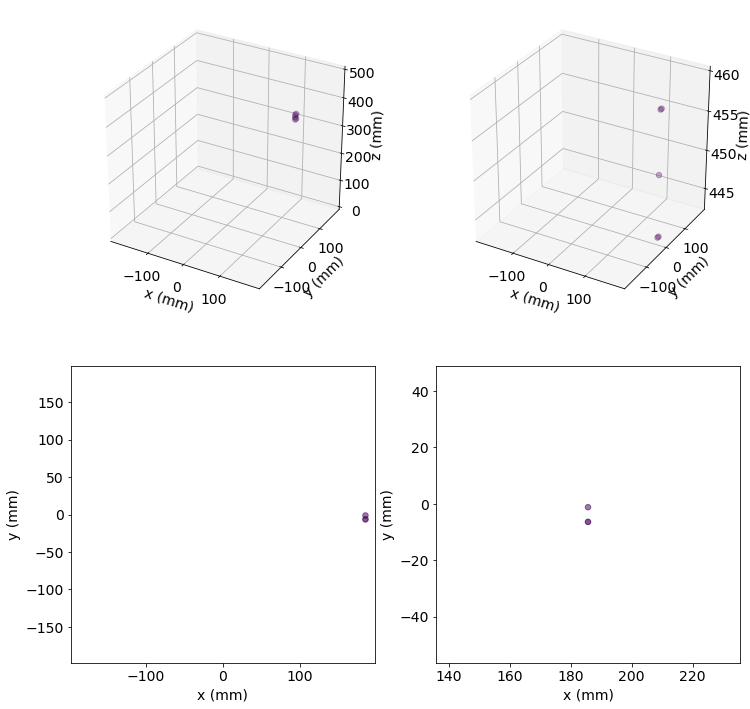

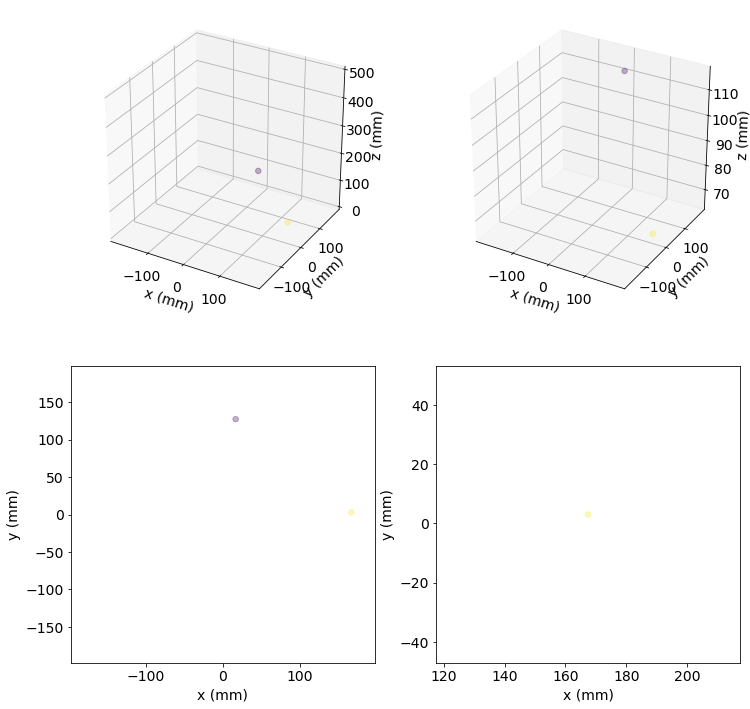

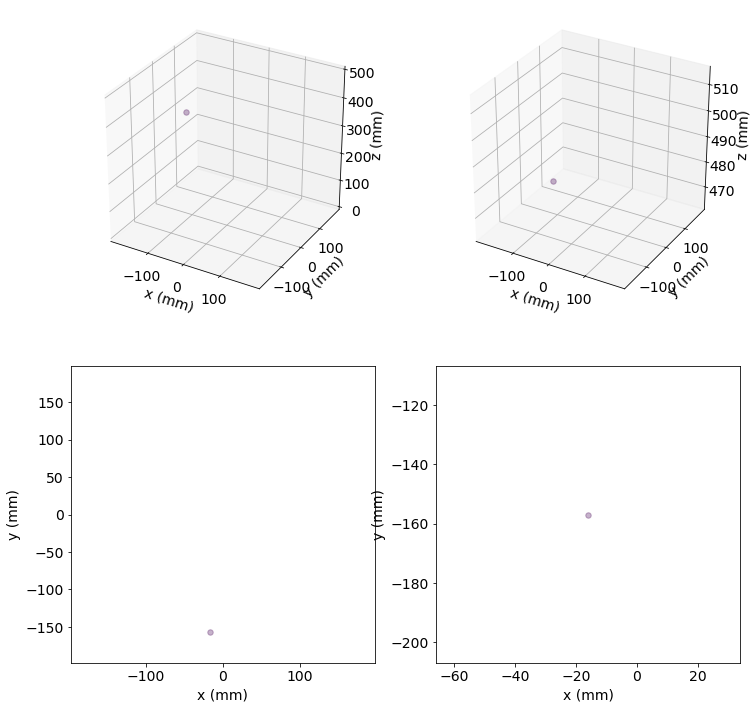

In [228]:
for trk_no in trkc.hit_collection():
    plot_tracks(trkc.hits(trk_no))

q = [ 0.9]
q = [ 0.8  0.8]


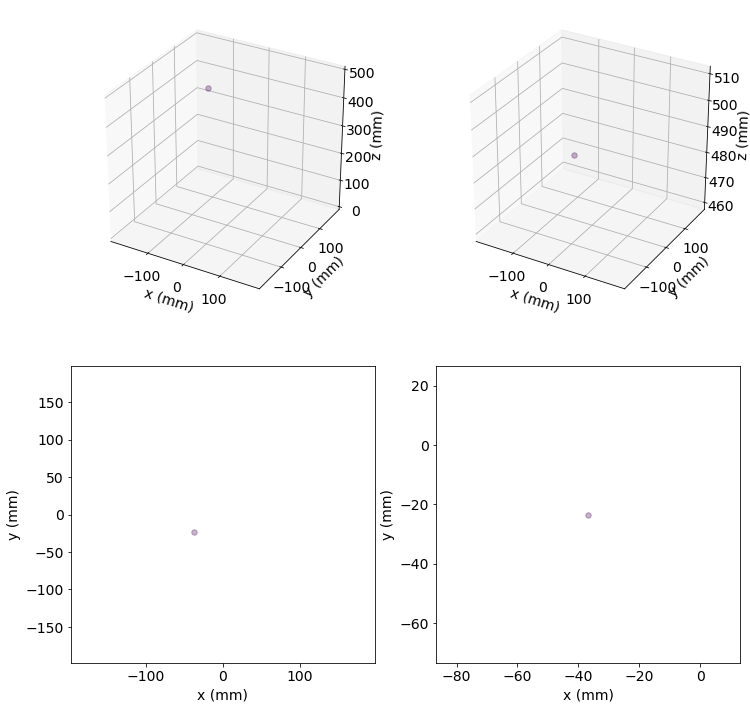

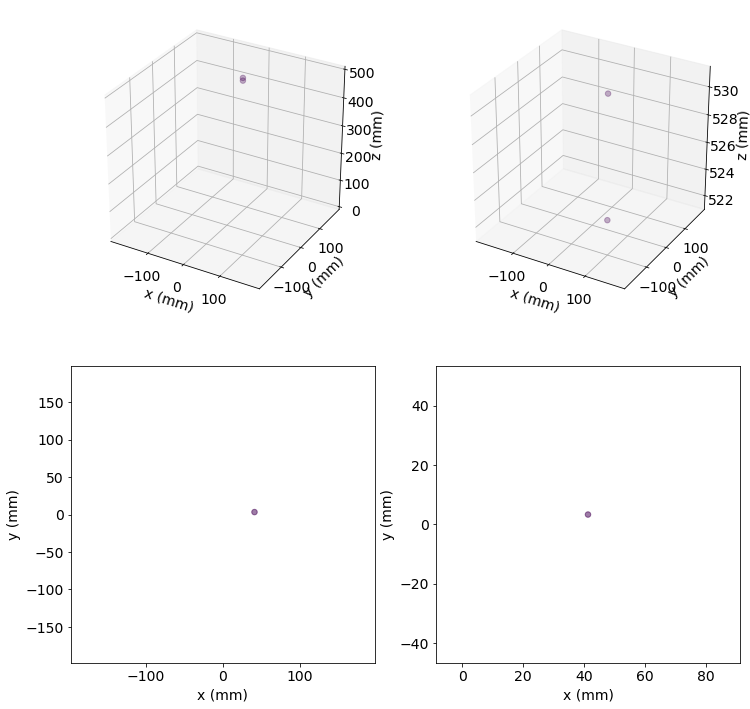

In [185]:
plot_tracks(trkc.hits(10), setq=True, qq=1)

In [ ]:
s1, s2, s2si = pio.s1_s2_si_from_pmaps(s1_dict, s2_dict, s2si_dict, event)

In [ ]:
s1

In [ ]:
plot_s12(s1)

In [ ]:
s2

In [ ]:
plot_s12(s2)

In [ ]:
plot_s2si_map(s2si, run_number=-4446)